<a href="https://colab.research.google.com/github/rushikeshnaik779/data_cleaning_projects/blob/main/DataCleaning102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/Jcharis/Data-Cleaning-Practical-Examples/master/Data_Cleaning_In_Python_Working_with_Str/dataset.csv

--2021-08-24 16:24:15--  https://raw.githubusercontent.com/Jcharis/Data-Cleaning-Practical-Examples/master/Data_Cleaning_In_Python_Working_with_Str/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206855 (202K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>] 202.01K  --.-KB/s    in 0.02s   

2021-08-24 16:24:15 (8.37 MB/s) - ‘dataset.csv’ saved [206855/206855]



In [3]:
# let's import the daata set 
import pandas as pd 
import numpy as np
import seaborn as sns 
import numpy as np

In [4]:
data = pd.read_csv('./dataset.csv')

In [5]:
data.head()

,id,Full Name,Date of Birth,email,gender,Job,Company,Country,Salary,Phone,Quote,Income,Income.1
0,1,Salim Pound,2/12/2018,spound0@spotify.com,Male,Editor,Gigashots,Israel,19QtDp5HkyuZZqwwqzYPSSLuA7MXFCwfKL,610-741-3882,Compatible discrete leverage,46476.638080,$46476.6380809961
1,2,Madelene Lutas,9/20/2018,mlutas1@si.edu,Female,VP Marketing,Wikivu,Mongolia,17ADLE8HiTj7m1tTbzboLDn7eiZ4TjetzZ,221-725-8860,Grass-roots real-time algorithm,54174.687950,$54174.6879482406
2,3,Dolli Swanbourne,11/18/2018,dswanbourne2@istockphoto.com,Female,Associate Professor,Dabfeed,Vietnam,16ThVxH72YAXWiEBeBZB1WYtXcfJMwUtoB,303-720-8280,Innovative system-worthy definition,5449.873348,$5449.87334818567
3,4,Graeme Croisier,9/29/2018,gcroisier3@parallels.com,Male,Mechanical Systems Engineer,Trudoo,Bosnia and Herzegovina,1JLUVwmjHvxgh53C7Afie3pWbjrYxV9Fnx,673-794-9917,Customer-focused didactic extranet,46784.630880,$46784.6308786279
4,5,Jillana Physic,4/19/2018,jphysic4@yellowbook.com,Female,Account Executive,Buzzshare,China,1DaEUNoAWL68pnvThSM5eBYgQMTv9mKyFG,709-146-6263,Progressive dynamic model,57486.495560,$57486.4955595568


In [7]:
# columns 
data.columns

Index(['id', 'Full Name', 'Date of Birth', 'email', 'gender', 'Job', 'Company',
       'Country', 'Salary', 'Phone', 'Quote', 'Income', 'Income.1'],
      dtype='object')

In [8]:
# lowering
data.columns = data.columns.str.lower()


In [9]:
data.columns

Index(['id', 'full name', 'date of birth', 'email', 'gender', 'job', 'company',
       'country', 'salary', 'phone', 'quote', 'income', 'income.1'],
      dtype='object')

In [13]:
# renaming columns 
data = data.rename(columns={'full name':'full_name','date of birth':'date_of_birth'})


In [14]:
data.head()

,id,full_name,date_of_birth,email,gender,job,company,country,salary,phone,quote,income,income.1
0,1,Salim Pound,2/12/2018,spound0@spotify.com,Male,Editor,Gigashots,Israel,19QtDp5HkyuZZqwwqzYPSSLuA7MXFCwfKL,610-741-3882,Compatible discrete leverage,46476.638080,$46476.6380809961
1,2,Madelene Lutas,9/20/2018,mlutas1@si.edu,Female,VP Marketing,Wikivu,Mongolia,17ADLE8HiTj7m1tTbzboLDn7eiZ4TjetzZ,221-725-8860,Grass-roots real-time algorithm,54174.687950,$54174.6879482406
2,3,Dolli Swanbourne,11/18/2018,dswanbourne2@istockphoto.com,Female,Associate Professor,Dabfeed,Vietnam,16ThVxH72YAXWiEBeBZB1WYtXcfJMwUtoB,303-720-8280,Innovative system-worthy definition,5449.873348,$5449.87334818567
3,4,Graeme Croisier,9/29/2018,gcroisier3@parallels.com,Male,Mechanical Systems Engineer,Trudoo,Bosnia and Herzegovina,1JLUVwmjHvxgh53C7Afie3pWbjrYxV9Fnx,673-794-9917,Customer-focused didactic extranet,46784.630880,$46784.6308786279
4,5,Jillana Physic,4/19/2018,jphysic4@yellowbook.com,Female,Account Executive,Buzzshare,China,1DaEUNoAWL68pnvThSM5eBYgQMTv9mKyFG,709-146-6263,Progressive dynamic model,57486.495560,$57486.4955595568


In [15]:
# split the column full name as first name and last name 
data['firstname'] = data.full_name.str.split(" ").str.get(0)
data['lastname'] = data.full_name.str.split(" ").str.get(1)
data.drop('full_name', axis=1, inplace=True)
data.head()


,id,date_of_birth,email,gender,job,company,country,salary,phone,quote,income,income.1,firstname,lastname
0,1,2/12/2018,spound0@spotify.com,Male,Editor,Gigashots,Israel,19QtDp5HkyuZZqwwqzYPSSLuA7MXFCwfKL,610-741-3882,Compatible discrete leverage,46476.638080,$46476.6380809961,Salim,Pound
1,2,9/20/2018,mlutas1@si.edu,Female,VP Marketing,Wikivu,Mongolia,17ADLE8HiTj7m1tTbzboLDn7eiZ4TjetzZ,221-725-8860,Grass-roots real-time algorithm,54174.687950,$54174.6879482406,Madelene,Lutas
2,3,11/18/2018,dswanbourne2@istockphoto.com,Female,Associate Professor,Dabfeed,Vietnam,16ThVxH72YAXWiEBeBZB1WYtXcfJMwUtoB,303-720-8280,Innovative system-worthy definition,5449.873348,$5449.87334818567,Dolli,Swanbourne
3,4,9/29/2018,gcroisier3@parallels.com,Male,Mechanical Systems Engineer,Trudoo,Bosnia and Herzegovina,1JLUVwmjHvxgh53C7Afie3pWbjrYxV9Fnx,673-794-9917,Customer-focused didactic extranet,46784.630880,$46784.6308786279,Graeme,Croisier
4,5,4/19/2018,jphysic4@yellowbook.com,Female,Account Executive,Buzzshare,China,1DaEUNoAWL68pnvThSM5eBYgQMTv9mKyFG,709-146-6263,Progressive dynamic model,57486.495560,$57486.4955595568,Jillana,Physic


In [18]:
# cleaning ncome ..we don;t want dolar there .
data['income.1'] = data['income.1'].str.replace("$", "")

In [24]:
data.salary[:10]


0    19QtDp5HkyuZZqwwqzYPSSLuA7MXFCwfKL
1    17ADLE8HiTj7m1tTbzboLDn7eiZ4TjetzZ
2    16ThVxH72YAXWiEBeBZB1WYtXcfJMwUtoB
3    1JLUVwmjHvxgh53C7Afie3pWbjrYxV9Fnx
4    1DaEUNoAWL68pnvThSM5eBYgQMTv9mKyFG
5    1PQnf9A1CPFYqKiRqUMQcrMwwVuxytGzCv
6    1DFtXEr5PLEa1FbACuLKAPt9wxBERqh3sV
7    1BRHmiaJur3qG1H4H1WsU8VJLKHwxvqRwF
8    1Bh5TDzod6dDQLC6WMwgHnUqH92kJ2scDg
9    1EFPyyrv2cyHDBxdN9eoJyCfwMafVS42KS
Name: salary, dtype: object

In [25]:
# check of nulls 
data.isna().sum()

id               0
date_of_birth    0
email            0
gender           0
job              0
company          0
country          2
salary           0
phone            0
quote            0
income           5
income.1         0
firstname        0
lastname         0
dtype: int64

In [26]:
# no nulls values 


In [27]:
# phone number 
data.phone[:10]

0    610-741-3882
1    221-725-8860
2    303-720-8280
3    673-794-9917
4    709-146-6263
5    773-395-7487
6    230-834-9807
7    280-484-7263
8    827-303-7439
9    486-637-5565
Name: phone, dtype: object

In [28]:
# let's replace "-" with ""
data.phone = data.phone.str.replace("-", "")

In [29]:
data.phone[:10]

0    6107413882
1    2217258860
2    3037208280
3    6737949917
4    7091466263
5    7733957487
6    2308349807
7    2804847263
8    8273037439
9    4866375565
Name: phone, dtype: object

In [32]:
# check country wise 
avg_income_country_wise = data.groupby('country')['country', 'income'].mean().reset_index()
avg_income_country_wise.columns = ['country', 'income']
avg_income_country_wise.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,country,income
0,Afghanistan,25991.576891
1,Albania,25338.862270
2,Andorra,48446.729940
3,Argentina,20878.719444
4,Armenia,34739.877675


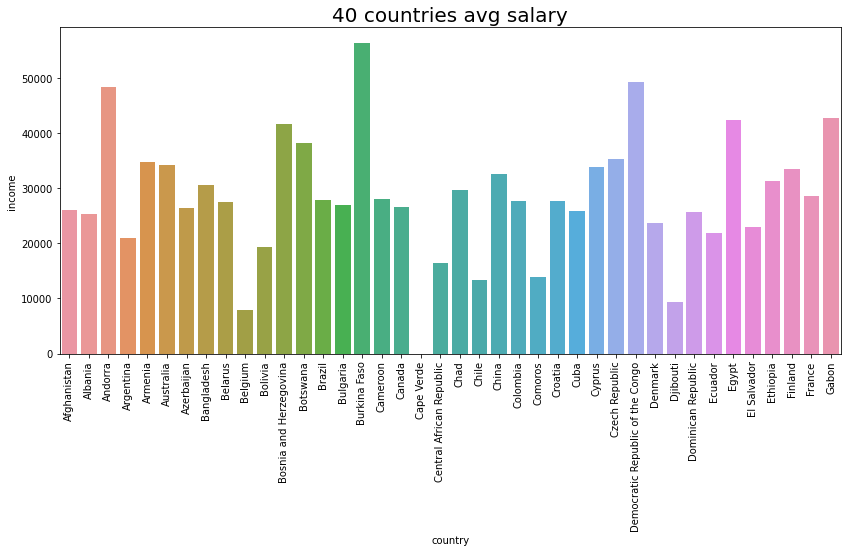

In [40]:
import matplotlib.pyplot as plt 

plt.subplots(1,1, figsize=(14, 6))
sns.barplot(data = avg_income_country_wise[:40], x='country', y='income')
plt.xticks(rotation=90)
plt.title('40 countries avg salary', size=20)
plt.show()